In [2]:
import joblib
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
import os
import numpy as np
from skimage import io, color, feature, exposure, transform
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


### Function to extract HOG features from an image and visualize it

In [3]:
def extract_hog_features(image):
    # Convert the image to grayscale
    gray_image = color.rgb2gray(image)

    # Calculate HOG features
    hog_features, hog_image = feature.hog(gray_image, visualize=True)

    # Enhance the contrast of the HOG image for better visualization
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    return hog_features, hog_image_rescaled

## Extract features

In [4]:
# dataset_path = 'eye_diseases'
#
# # List all subdirectories (assuming each subdirectory corresponds to a class)
# class_folders = [f.path for f in os.scandir(dataset_path) if f.is_dir()]
# features_list = []
#
# # Loop through each class folder
# for class_folder in class_folders:
#     print("Processing class...", class_folder, "\n\n\n\n\n")
#     class_name = os.path.basename(class_folder)
#     # Loop through each image in the class folder
#     for image_filename in os.listdir(class_folder):
#         image_path = os.path.join(class_folder, image_filename)
#
#         # Cataract, Glaucoma are of 256x256
#         # Diabetic_retinopathy, Normal are of 512x512
#
#         # Load the image
#         image = io.imread(image_path)
#         image = transform.resize(image, (256, 256, 3))
#         # Extract HOG features and visualize
#         hog_features, hog_image = extract_hog_features(image)
#
#         # Append HOG features to the features list
#         print("appending features into the list...")
#         features_list.append(hog_features)
#
# # Convert lists to NumPy arrays
# features_array = np.array(features_list)
# print(features_array)
# np.random.shuffle(features_array)
# np.save('hog_features.npy', features_array)
features_array = np.load("hog_features.npy")
print(features_array)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Visualize the hog image

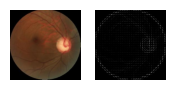

In [5]:
org_image = "eye_diseases\glaucoma\_100_965860.jpg"
org_image = io.imread(org_image)
org_image = transform.resize(org_image, (256, 256, 3))

feat, hog_org_image = extract_hog_features(org_image)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2, 2), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(org_image, cmap="gray")

ax2.axis('off')
ax2.imshow(hog_org_image, cmap="gray")

plt.show()

## Train Kmeans Model

In [13]:
n_clusters = 4
# Number of clusters (0 through 9 digits)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(features_array)
joblib.dump(kmeans, 'kmeans_fitted_hog.pkl')
# kmeans = joblib.load('kmeans_fitted_hog.pkl')

print(f'inertia: {kmeans.inertia_}')

c:\Users\ALY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


inertia: 1314941.0701321706


## Visualize the cluster centers (representative images)


(72900,)


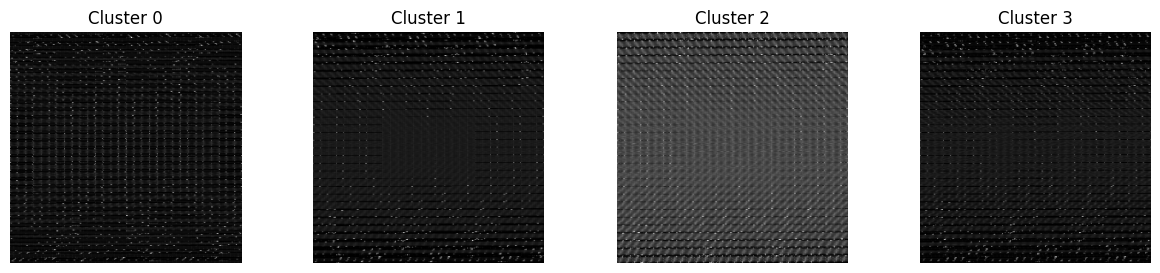

In [16]:
fig, ax = plt.subplots(1, n_clusters, figsize=(15, 3))

print(kmeans.cluster_centers_[0].shape)

for i in range(n_clusters):
    center_image = kmeans.cluster_centers_[i].reshape(270, 270)  # Reshape to original dimensions
    ax[i].imshow(center_image, cmap='gray')
    ax[i].axis('off')
    ax[i].set_title(f'Cluster {i}')

plt.show()


## Visualize the clusters centroids

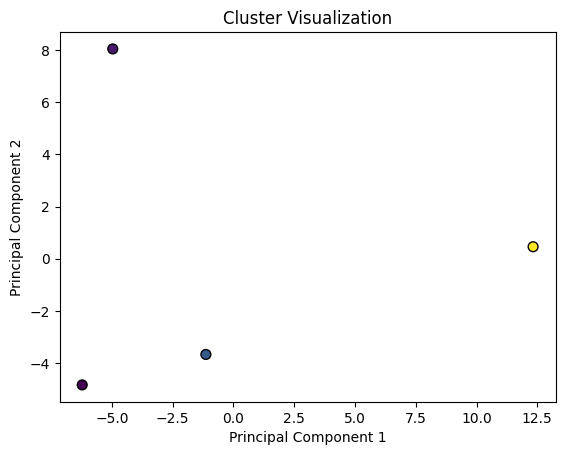

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(kmeans.cluster_centers_)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=[i for i in X_pca[:, 0]], cmap='viridis', edgecolor='k', s=50)
plt.title('Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Visualize features in 2D

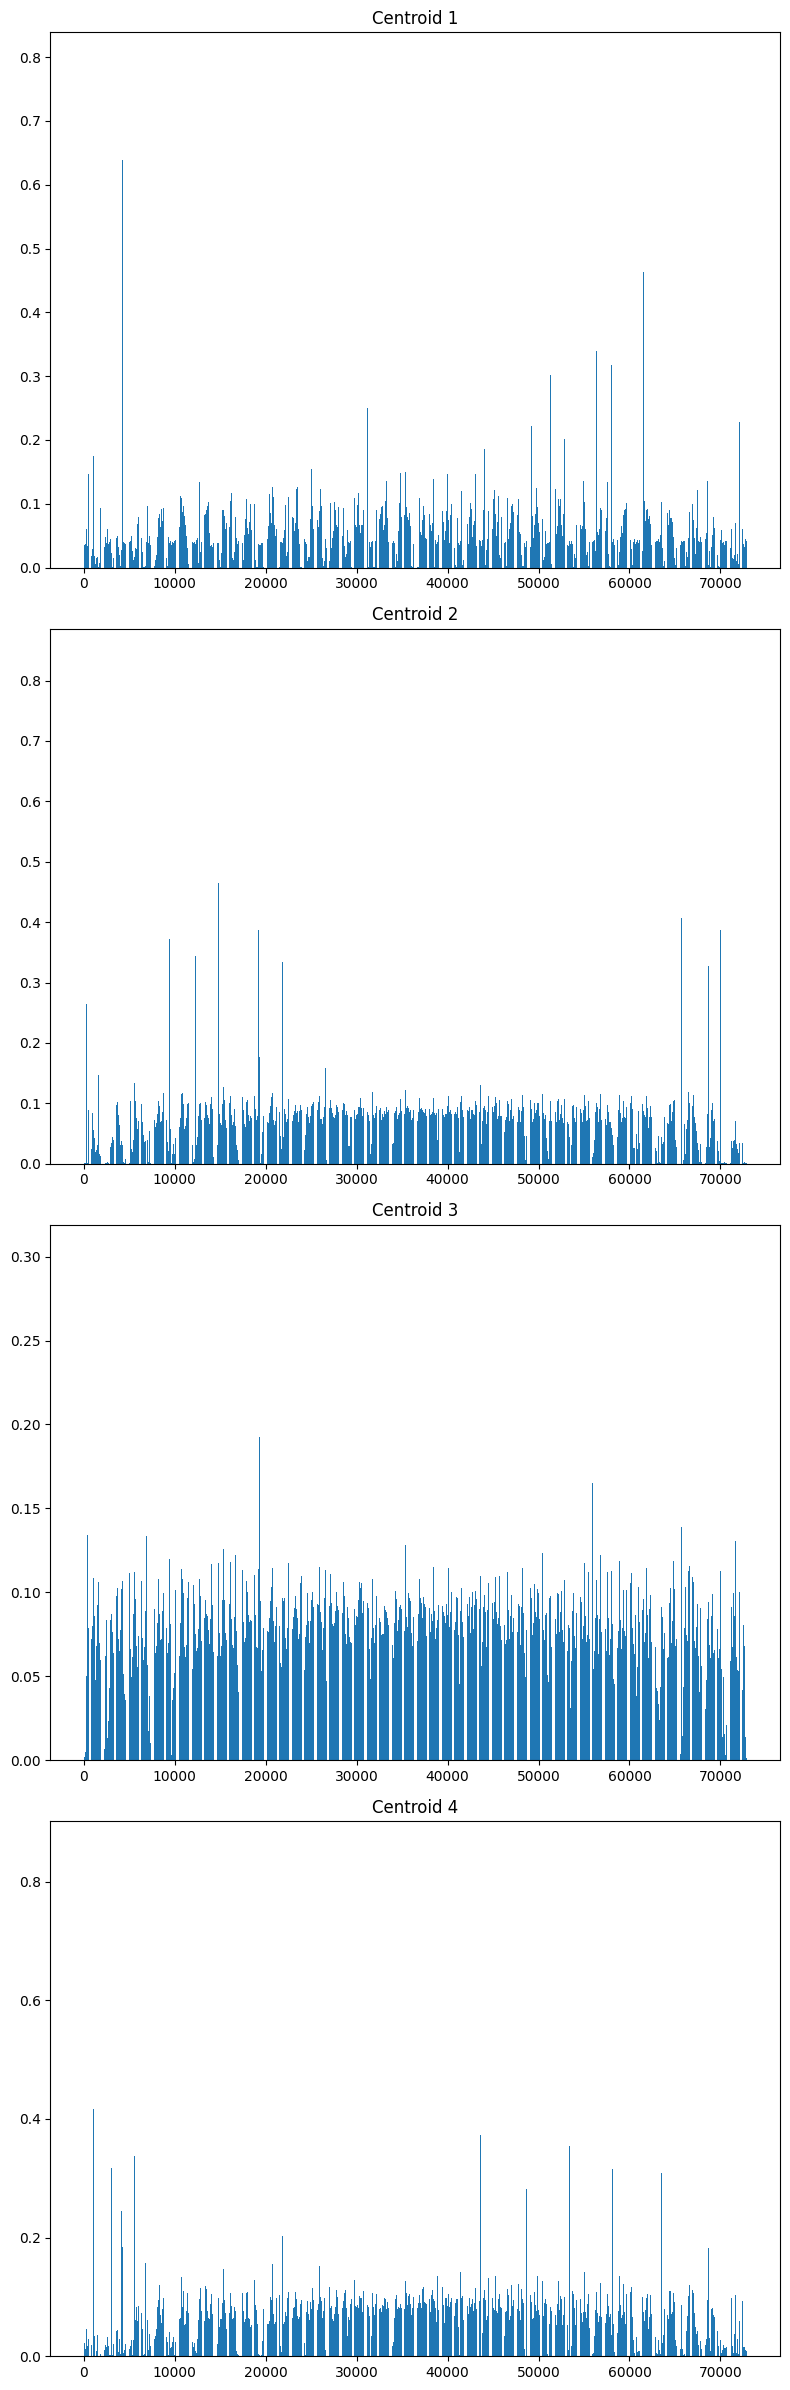

In [18]:
# Assuming you have the centroids as features
centroids = kmeans.cluster_centers_

# Assuming you have feature names for each centroid feature
feature_names = [i for i in range(72900)]  # Replace ... with actual feature names

num_clusters = len(centroids)
num_features = len(centroids[0])

# Plotting centroids as bar charts
fig, axs = plt.subplots(num_clusters, figsize=(8, 24))

for i in range(num_clusters):
    axs[i].bar(feature_names, centroids[i])
    axs[i].set_title(f'Centroid {i+1}')

plt.tight_layout()
plt.show()
